## Handling Outliers in Machine Learning



There are different way to detect and remove the outliers in dataset.
1. IQR(Inter Quartile Range)
2. Box Plot
2. Scatter Plot
4. Z-Score and Standard Deviation

### Outlier Detection in Titanic Dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# Import the dataset
df_titanic = pd.read_csv(r"D:\Notebooks\Practice CML and me\all_ml_dl\Data\Data_Files\Titanic\titanic_train.csv")

In [3]:
#imputing nan values
# Here I am explaining a common way to fill Nan value using mean but this is just for demonstration purpose.
# We cannot us mean directly for all type of Nan values we have to first understand the column significance in dataset.
# You can follow the handling the missing value video to understand different techniques.
df_titanic['Age']=df_titanic.Age.fillna(df_titanic.Age.mean())

In [4]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Box Plot

<Axes: >

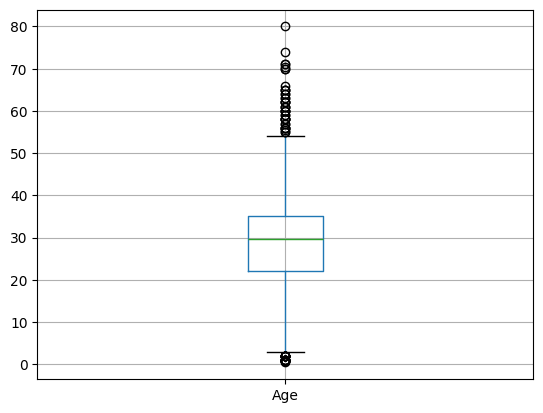

In [6]:
df_titanic.boxplot("Age")

<Axes: >

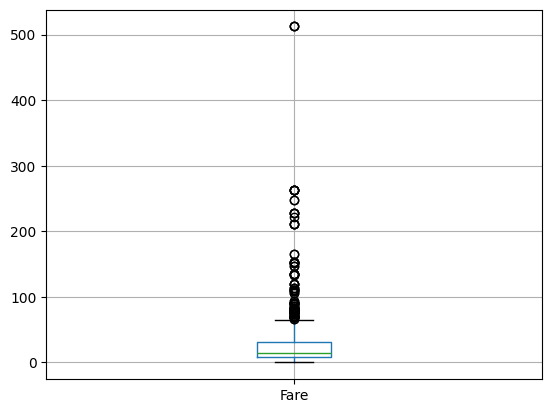

In [7]:
df_titanic.boxplot("Fare")

<Axes: ylabel='Age'>

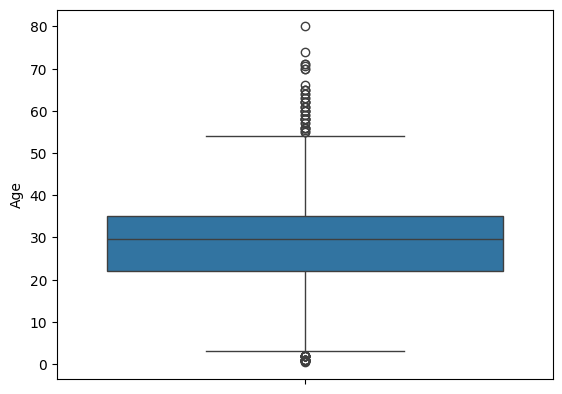

In [8]:
sns.boxplot(df_titanic["Age"])

<Axes: ylabel='Fare'>

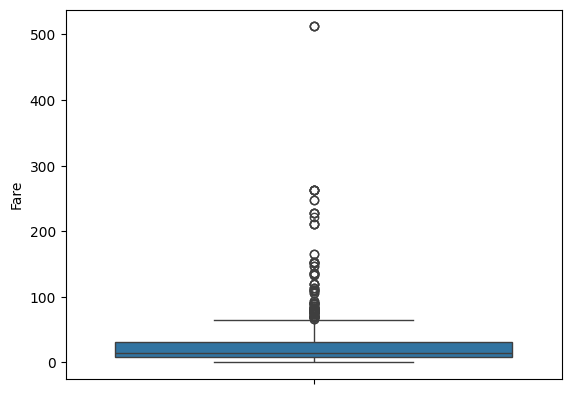

In [9]:
sns.boxplot(df_titanic["Fare"])

### Scatter -Plot

<Axes: xlabel='Age'>

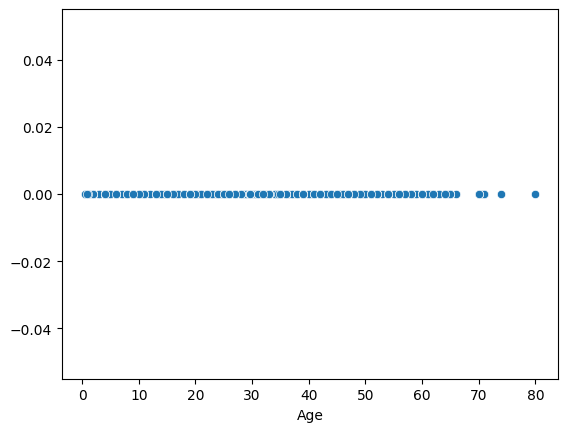

In [10]:
## 1-Dimentional Scatter Plot
sns.scatterplot(x="Age",y = np.zeros_like(df_titanic.Age),data=df_titanic)

<Axes: xlabel='Fare'>

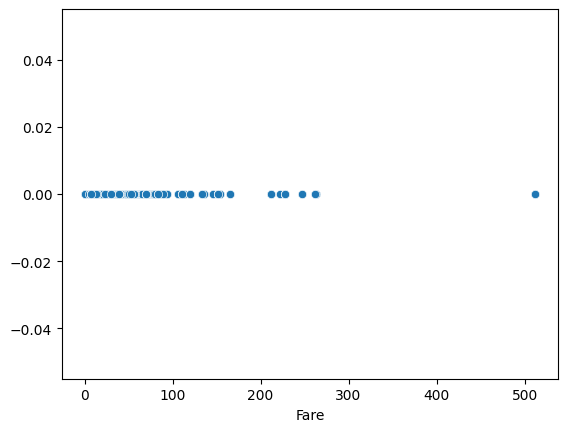

In [11]:
## 1-Dimentional Scatter Plot
sns.scatterplot(x="Fare",y = np.zeros_like(df_titanic.Fare),data=df_titanic)

### Data Distribution

C:\Users\HP\AppData\Local\Temp\ipykernel_3464\2514882296.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_titanic["Age"])


<Axes: xlabel='Age', ylabel='Density'>

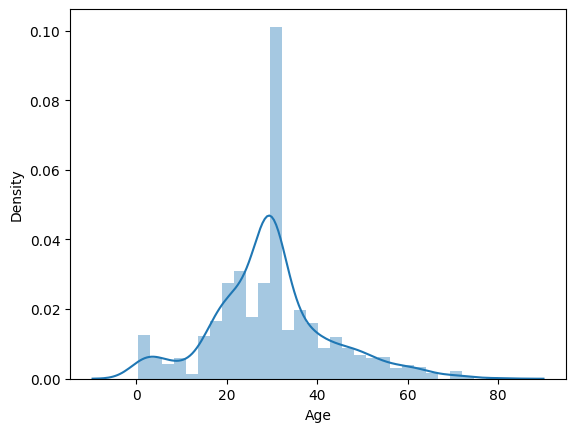

In [12]:
sns.distplot(df_titanic["Age"])

Data is normally distributed

C:\Users\HP\AppData\Local\Temp\ipykernel_3464\3068599684.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_titanic["Fare"])


<Axes: xlabel='Fare', ylabel='Density'>

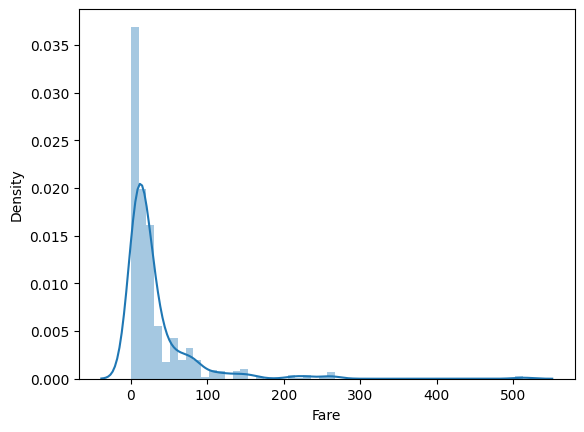

In [13]:
sns.distplot(df_titanic["Fare"])

Data is positively(Right) skewed.

### IQR(Inter Quartile Range)

In [14]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
#df_titanic.quantile([.25, .5, .75], axis = 0) 

numeric_columns = df_titanic.select_dtypes(include=['number'])
quantiles = numeric_columns.quantile([0.25, 0.5, 0.75])



In [16]:
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
# Calculate Q1, Q2, Q3 and IQR
Q1_Age,Q3_Age = df_titanic["Age"].quantile([0.25,0.75])  
print('Q1_Age 25 percentile of the given data is, ', Q1_Age)  
print('Q3_Age 75 percentile of the given data is, ', Q3_Age)
IQR_Age = Q3_Age - Q1_Age
print('Interquartile range for Age is : Q3 - Q1 = ', IQR_Age) 
# Find the lower and upper limits as Q1 – 1.5 IQR and Q3 + 1.5 IQR, respectively.
low_lim_Age = Q1_Age - 1.5 * IQR_Age 
up_lim_Age = Q3_Age + 1.5 * IQR_Age 
print('low_limit_Age is', low_lim_Age) 
print('up_limit_Age is', up_lim_Age) 
outlier_Age =[] 
for x in df_titanic["Age"]: 
    if ((x> up_lim_Age) or (x<low_lim_Age)): 
         outlier_Age.append(x) 
print(' outlier_Age in the dataset is', outlier_Age)
#assigning nan to the outliers
df_titanic['Age'].values[df_titanic['Age'] > up_lim_Age] = np.nan
df_titanic['Age'].values[df_titanic['Age'] < low_lim_Age] = np.nan


Q1_Age 25 percentile of the given data is,  22.0
Q3_Age 75 percentile of the given data is,  35.0
Interquartile range for Age is : Q3 - Q1 =  13.0
low_limit_Age is 2.5
up_limit_Age is 54.5
 outlier_Age in the dataset is [2.0, 58.0, 55.0, 2.0, 66.0, 65.0, 0.83, 59.0, 71.0, 70.5, 2.0, 55.5, 1.0, 61.0, 1.0, 56.0, 1.0, 58.0, 2.0, 59.0, 62.0, 58.0, 63.0, 65.0, 2.0, 0.92, 61.0, 2.0, 60.0, 1.0, 1.0, 64.0, 65.0, 56.0, 0.75, 2.0, 63.0, 58.0, 55.0, 71.0, 2.0, 64.0, 62.0, 62.0, 60.0, 61.0, 57.0, 80.0, 2.0, 0.75, 56.0, 58.0, 70.0, 60.0, 60.0, 70.0, 0.67, 57.0, 1.0, 0.42, 2.0, 1.0, 62.0, 0.83, 74.0, 56.0]


In [18]:
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             66
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
# Calculate Q1, Q2, Q3 and IQR
Q1_Fare,Q3_Fare = df_titanic["Fare"].quantile([0.25,0.75])  
print('Q1_Fare 25 percentile of the given data is, ', Q1_Fare)  
print('Q3_Fare 75 percentile of the given data is, ', Q3_Fare)
IQR_Fare = Q3_Fare - Q1_Fare
print('Interquartile range is : Q3-Q1 = ', IQR_Fare) 
# Find the lower and upper limits as Q1 – 1.5 IQR and Q3 + 1.5 IQR, respectively.
low_lim_Fare = Q1_Fare - 1.5 * IQR_Fare 
up_lim_Fare = Q3_Fare + 1.5 * IQR_Fare 
print('low_limit_Fare is', low_lim_Fare) 
print('up_limit_Fare is', up_lim_Fare) 
outlier_Fare =[] 
for x in df_titanic["Fare"]: 
    if ((x> up_lim_Fare) or (x<low_lim_Fare)): 
         outlier_Fare.append(x) 
print(' outlier_Fare in the dataset is', outlier_Fare)
#assigning nan to the outliers
df_titanic['Fare'].values[df_titanic['Fare'] > up_lim_Fare] = np.nan
df_titanic['Fare'].values[df_titanic['Fare'] < low_lim_Fare] = np.nan

Q1_Fare 25 percentile of the given data is,  7.9104
Q3_Fare 75 percentile of the given data is,  31.0
Interquartile range is : Q3-Q1 =  23.0896
low_limit_Fare is -26.724
up_limit_Fare is 65.6344
 outlier_Fare in the dataset is [71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 263.0, 77.2875, 247.5208, 73.5, 77.2875, 79.2, 66.6, 69.55, 69.55, 146.5208, 69.55, 113.275, 76.2917, 90.0, 83.475, 90.0, 79.2, 86.5, 512.3292, 79.65, 153.4625, 135.6333, 77.9583, 78.85, 91.0792, 151.55, 247.5208, 151.55, 110.8833, 108.9, 83.1583, 262.375, 164.8667, 134.5, 69.55, 135.6333, 153.4625, 133.65, 66.6, 134.5, 263.0, 75.25, 69.3, 135.6333, 82.1708, 211.5, 227.525, 73.5, 120.0, 113.275, 90.0, 120.0, 263.0, 81.8583, 89.1042, 91.0792, 90.0, 78.2667, 151.55, 86.5, 108.9, 93.5, 221.7792, 106.425, 71.0, 106.425, 110.8833, 227.525, 79.65, 110.8833, 79.65, 79.2, 78.2667, 153.4625, 77.9583, 69.3, 76.7292, 73.5, 113.275, 133.65, 73.5, 512.3292, 76.7292, 211.3375, 110.8833, 227.525, 151.55, 227.525, 

In [20]:
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             66
SibSp            0
Parch            0
Ticket           0
Fare           116
Cabin          687
Embarked         2
dtype: int64

IQR is a very aggressive method, and sometimes it treats normal values as outliers. Hence reducing the accuracy of the model. We can perform IQR again but this time we will replace 1.5 with 3, to remove the extreme outliers from the dataset.

In [21]:
# Import the dataset
df_titanic = pd.read_csv(r"D:\Notebooks\Practice CML and me\all_ml_dl\Data\Data_Files\Titanic\titanic_train.csv")
df_titanic['Age']=df_titanic.Age.fillna(df_titanic.Age.mean())

In [22]:
out=['Age'
    ,'Fare'
    ]
for i in out:
    q25,q75=df_titanic[i].quantile([.25,.75])
    iqr=q75-q25
    minimum=q25-(iqr*1.5)
    maximum=q75+(iqr*1.5)
#assigning nan to the outliers
    df_titanic[i].values[df_titanic[i] > maximum] = np.nan
    df_titanic[i].values[df_titanic[i] < minimum] = np.nan

In [23]:
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             66
SibSp            0
Parch            0
Ticket           0
Fare           116
Cabin          687
Embarked         2
dtype: int64

In [24]:
#imputing nan values
df_titanic['Age']=df_titanic.Age.fillna(df_titanic.Age.mean())
df_titanic['Fare']=df_titanic.Fare.fillna(df_titanic.Fare.mean())

In [25]:
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Apply Machine Learning Model

In [26]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250000,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,17.822091,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925000,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.100000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050000,NaN,S


In [27]:
df_titanic.drop(["Sex","Embarked","Name","Ticket","PassengerId","Cabin"],axis=1,inplace=True)

In [28]:
df_titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.250000
1,1,1,38.0,1,0,17.822091
2,1,3,26.0,0,0,7.925000
3,1,1,35.0,1,0,53.100000
4,0,3,35.0,0,0,8.050000


In [29]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 41.9 KB


In [30]:
X = df_titanic.iloc[:,df_titanic.columns!='Survived']
Y = df_titanic.Survived

In [31]:
df_titanic.shape

(891, 6)

In [32]:
X.shape

(891, 5)

In [33]:
Y.shape

(891,)

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
#Split the data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=0)
#train the model
model_rf=RandomForestClassifier(n_estimators=100)
model_rf.fit(X_train,y_train)

RandomForestClassifier()

In [35]:
#check the accuracy of the model
pred=model_rf.predict(X_test)
accuracy_score(y_test,pred)

0.7052238805970149

### Z-Score or Standard Deviations

1. **Z-scores** are the number of standard deviations above and below the mean that each value falls.
2. For example, a Z-score of 2 indicates that observation is two standard deviations above the average while a Z-score of -2 signifies it is two standard deviations below the mean. A Z-score of zero represents a value that equals the mean.
3. To calculate the Z-score for observation, subtract the observation from the mean, and divide by the standard deviation. 
4. A standard cut-off value for finding outliers are Z-scores of +/-3
5. You can follow below URL to understand the Z-score and Standard Deviation



In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
%matplotlib inline

In [37]:
# Import the dataset
df_titanic1 = pd.read_csv(r"D:\Notebooks\Practice CML and me\all_ml_dl\Data\Data_Files\Titanic\titanic_train.csv")

In [38]:
df_titanic1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
df_titanic1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [40]:
## Fill Null value
df_titanic1['Age']=df_titanic1.Age.fillna(df_titanic1.Age.mean())

In [41]:
df_titanic1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Standard Deviation
We use when data is normally distributed. We can see that "Age" is nornally distributed.

upper_limit :  68.70516332506747
lower_limit :  -9.306928030949834
Mean Value :  29.69911764705882
1st Standard Deviation :  13.002015226002884


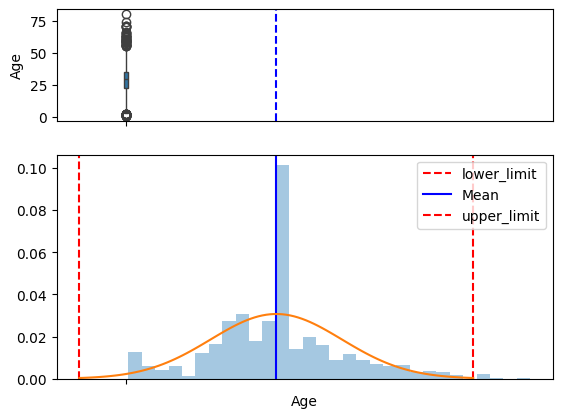

In [42]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.5, 1)})

mean=df_titanic1.Age.mean()
std = df_titanic1.Age.std()
median = df_titanic1.Age.median()
upper_limit = mean + std*3
lower_limit = mean - std*3
print("upper_limit : ", upper_limit)
print("lower_limit : ",lower_limit)

sns.boxplot(df_titanic1["Age"], ax=ax_box)
ax_box.axvline(mean, color='b', linestyle='--')


sns.distplot(df_titanic1["Age"], ax=ax_hist,kde=False,norm_hist=True)
ax_hist.axvline(lower_limit, color='r', linestyle='--')
ax_hist.axvline(mean, color='b', linestyle='-')
ax_hist.axvline(upper_limit, color='r', linestyle='--')



plt.legend({'Mean':mean})

ax_box.set(xlabel='')

x = np.linspace(mean - 3*std, mean + 3*std, 100)
plt.plot(x, norm.pdf(x, mean, std))
plt.legend({"lower_limit":lower_limit,'Mean':mean,'upper_limit':upper_limit})
print("Mean Value : ",mean)
#print("Median Value : ",median)
print("1st Standard Deviation : ",std)

plt.show()

In [43]:
df_titanic1["Age"].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [44]:
df_titanic_Age_outlier = df_titanic1[(df_titanic1.Age>upper_limit) | (df_titanic1.Age<lower_limit)]
df_titanic_Age_outlier

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


In [45]:
print(df_titanic_Age_outlier.shape)

(7, 12)


In [46]:
df_titanic_Age_wo_outlier = df_titanic1[(df_titanic1.Age<upper_limit) & (df_titanic1.Age>lower_limit)]
df_titanic_Age_wo_outlier.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [47]:
df_titanic_Age_wo_outlier.shape

(884, 12)

### Z-Score

In [48]:
# Import the dataset
df_titanic1 = pd.read_csv(r"D:\Notebooks\Practice CML and me\all_ml_dl\Data\Data_Files\Titanic\titanic_train.csv")

In [49]:
df_titanic1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [50]:
## Fill Null value
df_titanic1['Age']=df_titanic1.Age.fillna(df_titanic1.Age.mean())

In [51]:
df_titanic1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [52]:
df_titanic1["ZScore"] = (df_titanic1.Age - df_titanic1.Age.mean())/(df_titanic1.Age.std())
df_titanic1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ZScore
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,-0.592148
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.638430
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,-0.284503
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.407697
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.407697


Mean Value :  2.153159805333637e-16
1st Standard Deviation :  1.0000000000000007


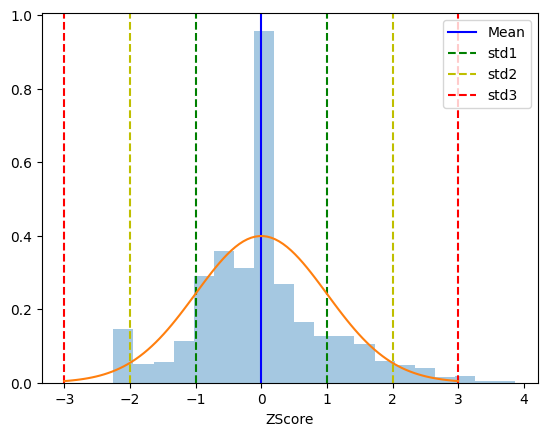

upper_limit :  68.70516332506747
lower_limit :  -9.306928030949834
Mean Value :  29.69911764705882


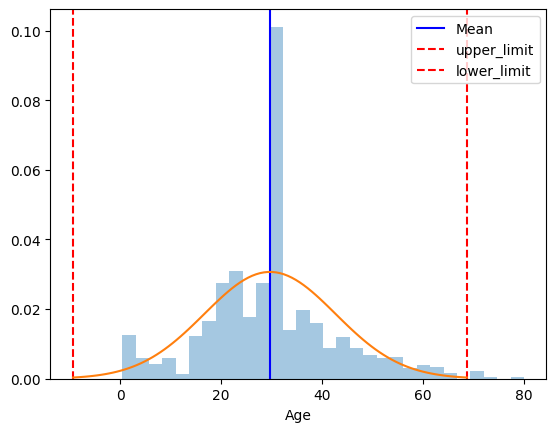

In [53]:
sns.distplot(df_titanic1["ZScore"], bins= 20,kde = False, norm_hist=True)
mean = df_titanic1["ZScore"].mean()
std = df_titanic1["ZScore"].std()
std1P = std
std1N = (-std)
std2P = std*2
std2N = (-std*2)
std3P = std*3
std3N = (-std*3)
plt.axvline(mean, color='b', linestyle='-')
plt.axvline(std1P, color='g', linestyle='--')
plt.axvline(std2P, color='y', linestyle='--')
plt.axvline(std3P, color='r', linestyle='--')
plt.axvline(std1N, color='g', linestyle='--')
plt.axvline(std2N, color='y', linestyle='--')
plt.axvline(std3N, color='r', linestyle='--')
x = np.linspace(mean - 3*std, mean + 3*std, 100)
plt.plot(x, norm.pdf(x, mean, std))
plt.legend({'Mean':mean,'std1':std1P,'std2':std2P,'std3':std3P})
print("Mean Value : ",mean)
print("1st Standard Deviation : ",std)
plt.show()
#############################################################
mean=df_titanic1.Age.mean()
std = df_titanic1.Age.std()
upper_limit = mean + std*3
lower_limit = mean - std*3
sns.distplot(df_titanic1["Age"],kde=False,norm_hist=True)
plt.axvline(mean, color='b', linestyle='-')
plt.axvline(upper_limit, color='r', linestyle='--')
plt.axvline(lower_limit, color='r', linestyle='--')
plt.legend({'Mean':mean})
x = np.linspace(mean - 3*std, mean + 3*std, 100)
plt.plot(x, norm.pdf(x, mean, std))
plt.legend({'Mean':mean,'upper_limit':upper_limit,"lower_limit":lower_limit})
print("upper_limit : ", upper_limit)
print("lower_limit : ",lower_limit)
print("Mean Value : ",mean)
plt.show()

In [54]:
df_titanic1_Age_outlier_Z = df_titanic1[(df_titanic1.ZScore>3) | (df_titanic1.ZScore<-3)]
df_titanic1_Age_outlier_Z

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ZScore
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,3.176499
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q,3.138043
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,3.176499
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S,3.868699
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S,3.099587
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S,3.099587
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S,3.407232


In [55]:
df_titanic1_Age_outlier_Z.shape

(7, 13)

In [56]:
df_titanic1_Age_wo_outlier_Z = df_titanic1[(df_titanic1.ZScore<3) & (df_titanic1.ZScore>-3)]
df_titanic1_Age_wo_outlier_Z

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ZScore
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,-0.592148
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,0.638430
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,-0.284503
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,0.407697
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,0.407697
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,-0.207592
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,-0.822881
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S,0.000000
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,-0.284503


In [57]:
df_titanic1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
ZScore           0
dtype: int64

In [58]:
#assigning nan to the outliers
df_titanic1['Age'].values[df_titanic1['ZScore'] > 3] = np.nan
df_titanic1['Age'].values[df_titanic1['ZScore'] < -3] = np.nan

In [59]:
df_titanic1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              7
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
ZScore           0
dtype: int64

In [60]:
#imputing nan values
df_titanic1['Age']=df_titanic1.Age.fillna(df_titanic1.Age.mean())

In [61]:
df_titanic1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
ZScore           0
dtype: int64

#### Lets Apply Machine Learning Model 

In [62]:
df_titanic1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ZScore
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,-0.592148
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.638430
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,-0.284503
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.407697
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.407697


In [63]:
df_titanic1.drop(["Sex","Embarked","Name","Ticket","PassengerId","Cabin","ZScore"],axis=1,inplace=True)

In [64]:
df_titanic1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [65]:
df_titanic1.isnull().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [66]:
df_titanic1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 41.9 KB


In [67]:
X1 = df_titanic1.iloc[:,df_titanic1.columns!='Survived']
Y1 = df_titanic1.Survived

In [68]:
df_titanic1.shape

(891, 6)

In [69]:
X1.shape

(891, 5)

In [70]:
Y1.shape

(891,)

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
#Split the data into train and test
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,Y1,test_size=0.3,random_state=0)
#train the model
model_rf=RandomForestClassifier(n_estimators=100)
model_rf.fit(X1_train,y1_train)

RandomForestClassifier()

In [72]:
#check the accuracy of the model
pred=model_rf.predict(X1_test)
accuracy_score(y1_test,pred)

0.7164179104477612